In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web
import numpy as np

In [2]:
tickers = ["AAPL", "MSFT", "GOOG", "NVDA"]

In [3]:
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source="yahoo", start="2009-1-1")["Adj Close"]

In [7]:
data.head()

,AAPL,MSFT,GOOG,NVDA
Date,,,,
2009-01-02,11.253528,15.592469,160.060059,8.016504
2009-01-05,11.728474,15.738195,163.412491,8.163763
2009-01-06,11.535025,15.922266,166.406265,8.439878
2009-01-07,11.285772,14.963554,160.403763,7.933669
2009-01-08,11.495339,15.431399,161.987823,7.731187


## Normal Returns

In [10]:
for x in tickers:
    data[f"{x} normal returns"] = data[f"{x}"]/data[f"{x}"].iloc[0]

In [11]:
data.head()

,AAPL,MSFT,GOOG,NVDA,AAPL normal returns,MSFT normal returns,GOOG normal returns,NVDA normal returns
Date,,,,,,,,
2009-01-02,11.253528,15.592469,160.060059,8.016504,1.000000,1.000000,1.000000,1.000000
2009-01-05,11.728474,15.738195,163.412491,8.163763,1.042204,1.009346,1.020945,1.018369
2009-01-06,11.535025,15.922266,166.406265,8.439878,1.025014,1.021151,1.039649,1.052813
2009-01-07,11.285772,14.963554,160.403763,7.933669,1.002865,0.959665,1.002147,0.989667
2009-01-08,11.495339,15.431399,161.987823,7.731187,1.021488,0.989670,1.012044,0.964409


## Allocations for each security

In [12]:
weights = [0.3,0.2,0.3,0.2]
for w, t in zip(weights, tickers):
    data[f"{t} allocation"] = data[f"{t} normal returns"] * w

In [13]:
data.head()

,AAPL,MSFT,GOOG,NVDA,AAPL normal returns,MSFT normal returns,GOOG normal returns,NVDA normal returns,AAPL allocation,MSFT allocation,GOOG allocation,NVDA allocation
Date,,,,,,,,,,,,
2009-01-02,11.253528,15.592469,160.060059,8.016504,1.000000,1.000000,1.000000,1.000000,0.300000,0.200000,0.300000,0.200000
2009-01-05,11.728474,15.738195,163.412491,8.163763,1.042204,1.009346,1.020945,1.018369,0.312661,0.201869,0.306283,0.203674
2009-01-06,11.535025,15.922266,166.406265,8.439878,1.025014,1.021151,1.039649,1.052813,0.307504,0.204230,0.311895,0.210563
2009-01-07,11.285772,14.963554,160.403763,7.933669,1.002865,0.959665,1.002147,0.989667,0.300860,0.191933,0.300644,0.197933
2009-01-08,11.495339,15.431399,161.987823,7.731187,1.021488,0.989670,1.012044,0.964409,0.306446,0.197934,0.303613,0.192882


## Posittion for each stock at an investment of 200,000

In [15]:
for t in tickers:
    data[f"{t} position"] = data[f"{t} allocation"] * 200000

In [16]:
data.head()

,AAPL,MSFT,GOOG,NVDA,AAPL normal returns,MSFT normal returns,GOOG normal returns,NVDA normal returns,AAPL allocation,MSFT allocation,GOOG allocation,NVDA allocation,AAPL position,MSFT position,GOOG position,NVDA position
Date,,,,,,,,,,,,,,,,
2009-01-02,11.253528,15.592469,160.060059,8.016504,1.000000,1.000000,1.000000,1.000000,0.300000,0.200000,0.300000,0.200000,60000.000000,40000.000000,60000.000000,40000.000000
2009-01-05,11.728474,15.738195,163.412491,8.163763,1.042204,1.009346,1.020945,1.018369,0.312661,0.201869,0.306283,0.203674,62532.251418,40373.837400,61256.690375,40734.777919
2009-01-06,11.535025,15.922266,166.406265,8.439878,1.025014,1.021151,1.039649,1.052813,0.307504,0.204230,0.311895,0.210563,61500.846724,40846.041218,62378.934528,42112.507932
2009-01-07,11.285772,14.963554,160.403763,7.933669,1.002865,0.959665,1.002147,0.989667,0.300860,0.191933,0.300644,0.197933,60171.917731,38386.619016,60128.840721,39586.676714
2009-01-08,11.495339,15.431399,161.987823,7.731187,1.021488,0.989670,1.012044,0.964409,0.306446,0.197934,0.303613,0.192882,61289.258409,39586.800865,60722.640580,38576.349936


### Total Positon

In [17]:
data.columns

Index(['AAPL', 'MSFT', 'GOOG', 'NVDA', 'AAPL normal returns',
       'MSFT normal returns', 'GOOG normal returns', 'NVDA normal returns',
       'AAPL allocation', 'MSFT allocation', 'GOOG allocation',
       'NVDA allocation', 'AAPL position', 'MSFT position', 'GOOG position',
       'NVDA position'],
      dtype='object')

In [18]:
data["total position"] = data[['AAPL position', 'MSFT position', 'GOOG position','NVDA position']].sum(axis = 1)

In [19]:
data.head()

,AAPL,MSFT,GOOG,NVDA,AAPL normal returns,MSFT normal returns,GOOG normal returns,NVDA normal returns,AAPL allocation,MSFT allocation,GOOG allocation,NVDA allocation,AAPL position,MSFT position,GOOG position,NVDA position,total position
Date,,,,,,,,,,,,,,,,,
2009-01-02,11.253528,15.592469,160.060059,8.016504,1.000000,1.000000,1.000000,1.000000,0.300000,0.200000,0.300000,0.200000,60000.000000,40000.000000,60000.000000,40000.000000,200000.000000
2009-01-05,11.728474,15.738195,163.412491,8.163763,1.042204,1.009346,1.020945,1.018369,0.312661,0.201869,0.306283,0.203674,62532.251418,40373.837400,61256.690375,40734.777919,204897.557112
2009-01-06,11.535025,15.922266,166.406265,8.439878,1.025014,1.021151,1.039649,1.052813,0.307504,0.204230,0.311895,0.210563,61500.846724,40846.041218,62378.934528,42112.507932,206838.330402
2009-01-07,11.285772,14.963554,160.403763,7.933669,1.002865,0.959665,1.002147,0.989667,0.300860,0.191933,0.300644,0.197933,60171.917731,38386.619016,60128.840721,39586.676714,198274.054182
2009-01-08,11.495339,15.431399,161.987823,7.731187,1.021488,0.989670,1.012044,0.964409,0.306446,0.197934,0.303613,0.192882,61289.258409,39586.800865,60722.640580,38576.349936,200175.049790


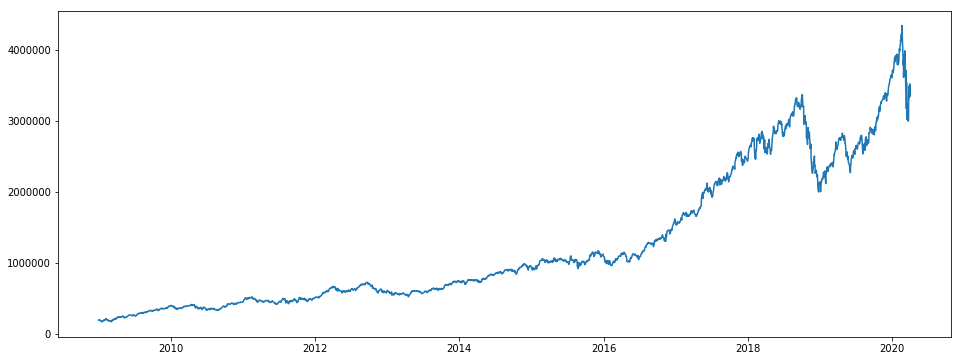

In [20]:
plt.figure(figsize=(16,6))
plt.plot(data["total position"])

### Daily Returns

In [21]:
data["daily returns"] =data["total position"].pct_change()

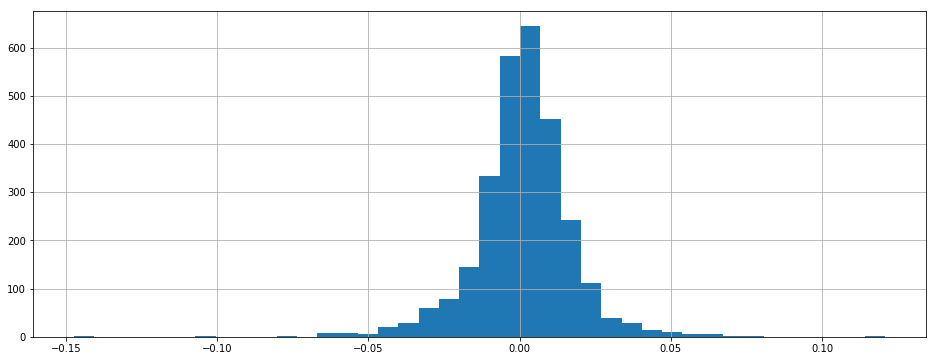

In [25]:
plt.figure(figsize=(16,6))
data["daily returns"].hist(bins =40)

## Sharp Ratio calculation

In [26]:
mean_Daily_return = data["daily returns"].mean()

In [27]:
port_volitility = data["daily returns"].std()

In [29]:
port_sharp = (mean_Daily_return/port_volitility) * np.sqrt(252)
port_sharp

1.1083262283329838

## there is a huge possibility that the could increase the sharp on the portfilio by not guessing but finding weights that would work better Using random allocations

In [32]:
data.columns

Index(['AAPL', 'MSFT', 'GOOG', 'NVDA', 'AAPL normal returns',
       'MSFT normal returns', 'GOOG normal returns', 'NVDA normal returns',
       'AAPL allocation', 'MSFT allocation', 'GOOG allocation',
       'NVDA allocation', 'AAPL position', 'MSFT position', 'GOOG position',
       'NVDA position', 'total position', 'daily returns'],
      dtype='object')

In [33]:
port_daily_returns = data[['AAPL', 'MSFT', 'GOOG', 'NVDA']].pct_change()

In [45]:
number_of_portfolios = 2000
all_weights = np.zeros((number_of_portfolios, len(tickers)))
all_returns = np.zeros(number_of_portfolios)
all_vol = np.zeros(number_of_portfolios)
all_sharps = np.zeros(number_of_portfolios)

for ind in range(number_of_portfolios):
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(port_daily_returns.mean() * weights) * 252
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(port_daily_returns.cov() * 252, weights)))
    all_sharps[ind] = all_returns[ind]/all_vol[ind]

In [46]:
max_sharp = all_sharps.argmax()

In [47]:
max_returns = all_returns.argmax()

In [48]:
lowest_Vol = all_vol.argmin()

### plot frontier

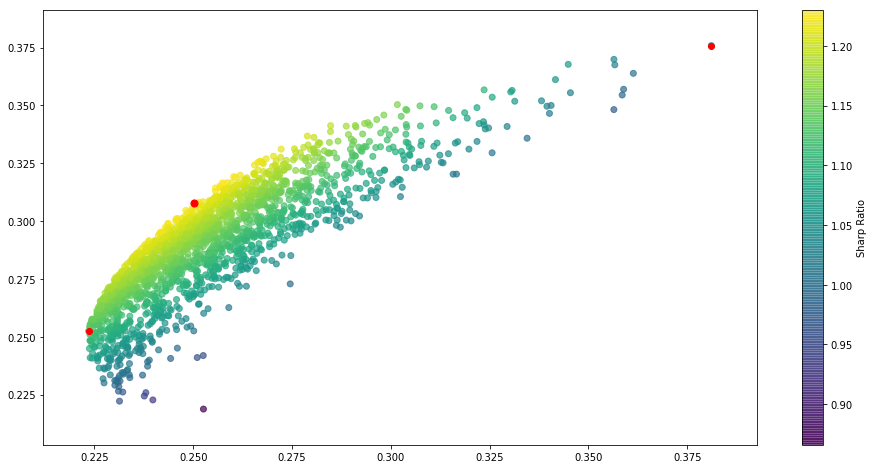

In [60]:
plt.figure(figsize=(16,8))
plt.scatter(all_vol, all_returns, c = all_sharps, cmap="viridis", alpha=0.7)
plt.colorbar(label = "Sharp Ratio")
plt.scatter(all_vol[max_sharp], all_returns[max_sharp], c = "r", s = 50)
plt.scatter(all_vol[max_returns], all_returns[max_returns], c = "r")
plt.scatter(all_vol[lowest_Vol], all_returns[lowest_Vol], c = "r")

### lets try this mathmatically

In [61]:
def ret_vol_shp(weights):
    weights = np.array(weights)
    ret = np.sum(port_daily_returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(port_daily_returns.cov() * 252, weights)))
    shp = ret/vol
    return np.array([ret,vol,shp])

In [71]:
def minimize_shp(weights):
    return ret_vol_shp(weights)[2] * -1

In [72]:
def check_weights(weights):
    return np.sum(weights) - 1

In [73]:
initial_guess = [0.25] * len(tickers)

In [74]:
initial_guess

[0.25, 0.25, 0.25, 0.25]

In [75]:
const = {"type": "eq", "fun": check_weights}

In [76]:
bounds = ((0,1),) * len(tickers)
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [77]:
from scipy.optimize import minimize

In [80]:
optimal_results = minimize(minimize_shp, initial_guess, method="SLSQP", bounds=bounds, constraints=const)

### Optimal results shows that the max sharp for this portfolio is 1.23 and the best weights are represented by thr x value. We we will test these weights to check the expected returns, vol, and sharp

In [79]:
optimal_results

     fun: -1.231131969115756
     jac: array([ 8.28057528e-05, -5.49852848e-06,  2.88873911e-04, -2.39044428e-04])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.56366687, 0.23807546, 0.00383311, 0.19442455])

## bases on the returned X values the max return for this portfolio is 31% with a volitility of 25% if interested in a sharp of 1.23

In [81]:
ret_vol_shp(optimal_results.x)

array([0.31203963, 0.2534575 , 1.23113197])

### lets get the efficient frontier of this portfolio and add it to the plot above

In [84]:
frontier_y = np.linspace(0.2,0.4,100)

In [86]:
frontier_vol = []

In [85]:
def min_vol(weights):
    return ret_vol_shp(weights)[1]

In [87]:
for potential_return in frontier_y:
    con = ({"type": 'eq', "fun": check_weights}, {"type": "eq", "fun": lambda w: ret_vol_shp(w)[0] - potential_return})
    results = minimize(min_vol, initial_guess, method="SLSQP", bounds=bounds, constraints=con)
    frontier_vol.append(results["fun"])

## lets plot the frontier on the portfolios plot

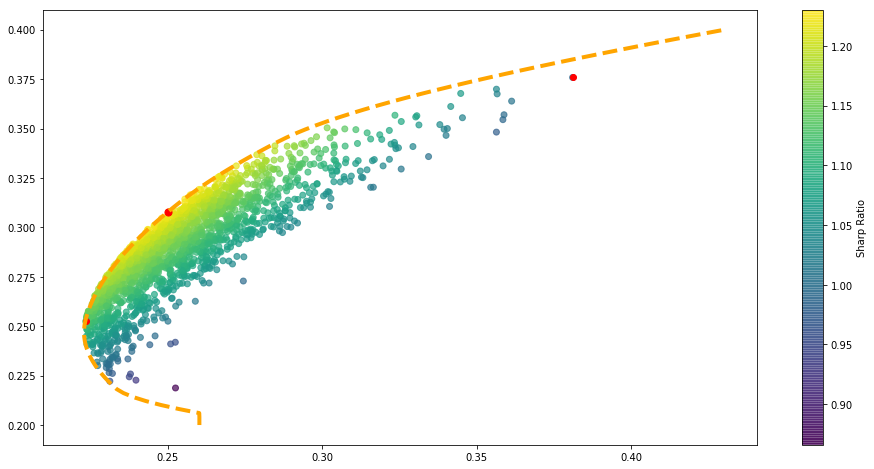

In [90]:
plt.figure(figsize=(16,8))
plt.scatter(all_vol, all_returns, c = all_sharps, cmap="viridis", alpha=0.7)
plt.colorbar(label = "Sharp Ratio")
plt.scatter(all_vol[max_sharp], all_returns[max_sharp], c = "r", s = 50)
plt.scatter(all_vol[max_returns], all_returns[max_returns], c = "r")
plt.scatter(all_vol[lowest_Vol], all_returns[lowest_Vol], c = "r")
plt.plot(frontier_vol, frontier_y, ls = "--", c = "orange", lw = 4)